#### Correlation between a player's height and their ranking

In [7]:
import pandas as pd
import numpy as np
from glob import glob
import os

In [8]:
days_to_query = os.listdir("../data/raw/tennis_data")
homeinfo_load_files = []

for day in days_to_query:
    homeinfo_load_files.extend(
        glob(
            f"../data/raw/tennis_data/{day}/data/raw/raw_match_parquet/home_team_*.parquet", recursive=True
        )
    )
homeinfo_df = pd.concat([pd.read_parquet(file) for file in homeinfo_load_files], ignore_index=True)
display(homeinfo_df)

C:\Users\moham\AppData\Local\Temp\ipykernel_25176\700993881.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  homeinfo_df = pd.concat([pd.read_parquet(file) for file in homeinfo_load_files], ignore_index=True)


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,...,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11998445,Cazaux A.,cazaux-arthur,M,4481.0,None,"Montpellier, France",1.83,NaN,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11998446,Lestienne C.,lestienne-constant,M,2032.0,"Paris, France","Amiens, France",1.80,72.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11998447,Ćorić B.,coric-borna,M,12414.0,"Dubai, UAE","Zagreb, Croatia",1.88,85.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11998448,Mmoh M.,mmoh-michael,M,2206.0,"Bradenton, FL, USA","Riyadh, Saudi Arabia",1.88,90.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11998449,Paire B.,paire-benoit,M,6089.0,"Geneva, Switzerland","Avignon, France",1.96,80.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60769,12213482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,None,None,NaN,NaN,NaN,None,None,None
60770,12213483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,None,None,NaN,NaN,NaN,None,None,None
60771,12213484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,None,None,NaN,NaN,NaN,None,None,None
60772,12213486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,None,None,NaN,NaN,NaN,None,None,None


In [10]:
days_to_query_ = os.listdir("../data/raw/tennis_data")
awayinfo_load_files = []

for day in days_to_query_:
    awayinfo_load_files.extend(
        glob(
            f"../data/raw/tennis_data/{day}/data/raw/raw_match_parquet/away_team_*.parquet", recursive=True
        )
    )
awayinfo_df = pd.concat([pd.read_parquet(file) for file in awayinfo_load_files], ignore_index=True)
display(awayinfo_df)

C:\Users\moham\AppData\Local\Temp\ipykernel_25176\3211180154.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  awayinfo_df = pd.concat([pd.read_parquet(file) for file in awayinfo_load_files], ignore_index=True)


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,...,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11998445,Auger-Aliassime F.,auger-aliassime-felix,M,23318.0,"Monte Carlo, Monaco","Montreal, Canada",1.93,87.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11998446,Cobolli F.,flavio-cobolli,M,5995.0,Rome,"Florence, Italy",1.83,71.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11998447,Martínez P.,martinez-pedro,M,2621.0,"Valencia, Spain","Alzira, Spain",1.85,76.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11998448,Muller A.,muller-alexandre,M,2443.0,France,"Poissy, France",1.83,73.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11998449,Mayot H.,mayot-harold,M,1492.0,"Marly, France","Metz, France",1.78,78.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59251,12213482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,None,None,NaN,NaN,NaN,None,None,None
59252,12213483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,None,None,NaN,NaN,NaN,None,None,None
59253,12213484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,None,None,NaN,NaN,NaN,None,None,None
59254,12213486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,None,None,NaN,NaN,NaN,None,None,None


In [24]:
totalinfo_team = pd.concat([homeinfo_df, awayinfo_df])
unique_df = totalinfo_team[["full_name", "player_id", "height", "current_rank"]].drop_duplicates(subset='player_id')
filtered_df = unique_df[unique_df['height'].notna() & unique_df['current_rank'].notna()]
display(filtered_df)

,full_name,player_id,height,current_rank
0,"Cazaux, Arthur",287803.0,1.83,86.0
1,"Lestienne, Constant",62790.0,1.80,99.0
2,"Ćorić, Borna",64580.0,1.88,31.0
3,"Mmoh, Michael",131442.0,1.88,122.0
4,"Paire, Benoit",22218.0,1.96,110.0
...,...,...,...,...
53246,"Zhu, Evan",162144.0,1.85,519.0
53369,"Salazar, Amador",271977.0,1.73,1407.0
54192,"Danilović, Olga",199790.0,1.82,128.0
54541,"Chepelev, Andrey",188944.0,1.78,508.0


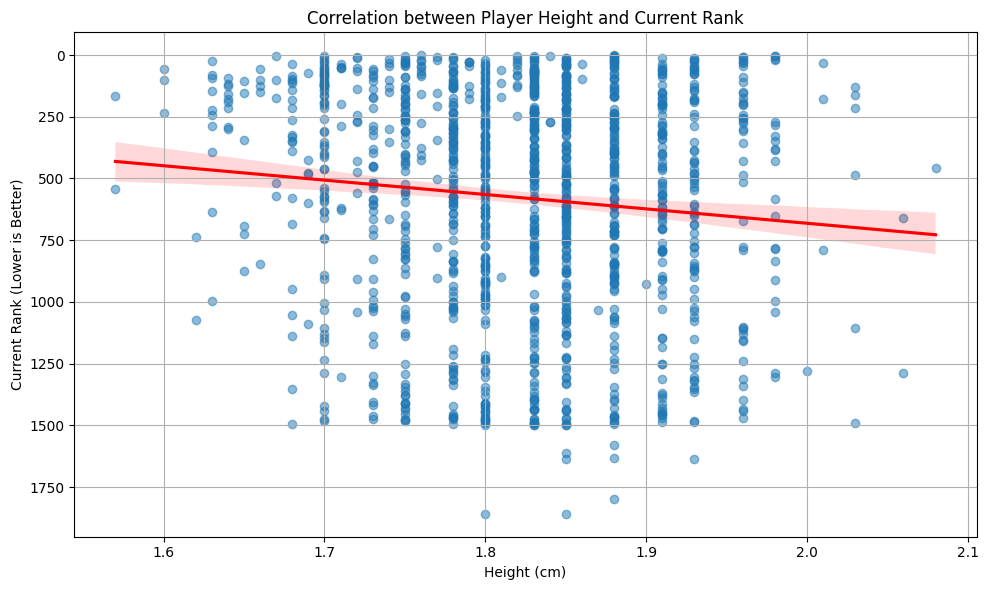

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert to numeric
filtered_df['height'] = pd.to_numeric(filtered_df['height'], errors='coerce')
filtered_df['current_rank'] = pd.to_numeric(filtered_df['current_rank'], errors='coerce')

# Drop rows with conversion issues
filtered_df = filtered_df.dropna(subset=['height', 'current_rank'])

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='height',
    y='current_rank',
    data=filtered_df,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Correlation between Player Height and Current Rank')
plt.xlabel('Height (cm)')
plt.ylabel('Current Rank (Lower is Better)')
plt.gca().invert_yaxis()  # Better rank = higher position on graph
plt.grid(True)
plt.tight_layout()
plt.show()

#### Correlation between height and rank in each person

In [27]:
correlation = filtered_df['height'].corr(filtered_df['current_rank'])
print(f"Pearson correlation between height and rank: {correlation:.2f}")

Pearson correlation between height and rank: 0.11
